<a href="https://colab.research.google.com/github/Monisha-11/WORKSHOP---2---DL/blob/main/WORKSHOP_2(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : MONISHA T

REG NO : 212221240029

1) Write a python code to load the CIFAR-10 dataset

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


2) Convert the output to one-hot encoded array

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(50000, 10)

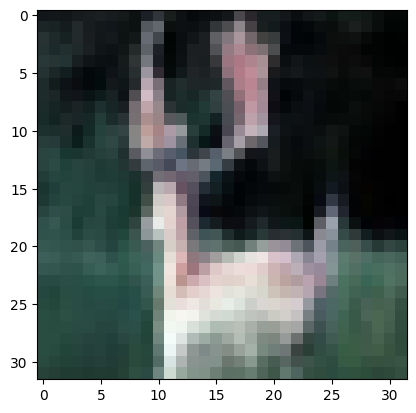

In [ ]:
single_image = X_train[1310]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[850]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,32,32,3)
X_test_scaled = X_test_scaled.reshape(-1,32,32,3)

3. Create a sequential model with appropriate number of neurons in the output layer, activation function and loss function

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(32,32,3)))
model.add(layers.Conv2D(filters=62,kernel_size=(4,4),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(4,4)))
model.add(layers.Flatten())
model.add(layers.Dense(77,activation="relu"))
model.add(layers.Dense(88,activation="relu"))
model.add(layers.Dense(99,activation="relu"))
model.add(layers.Dense(66,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 62)        3038      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 62)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3038)              0         
                                                                 
 dense (Dense)               (None, 77)                234003    
                                                                 
 dense_1 (Dense)             (None, 88)                6864      
                                                                 
 dense_2 (Dense)             (None, 99)                8811      
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=3,
          batch_size=84,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/3
596/596 [==============================] - 53s 85ms/step - loss: 1.5699 - accuracy: 0.4178 - val_loss: 1.3136 - val_accuracy: 0.5279
Epoch 2/3
596/596 [==============================] - 45s 75ms/step - loss: 1.2163 - accuracy: 0.5613 - val_loss: 1.1798 - val_accuracy: 0.5841
Epoch 3/3
596/596 [==============================] - 46s 77ms/step - loss: 1.0843 - accuracy: 0.6147 - val_loss: 1.0897 - val_accuracy: 0.6263


4. Plot iteration vs accuracy and iteration vs loss for test and training data

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.569946,0.41780,1.313649,0.5279
1,1.216302,0.56130,1.179772,0.5841
2,1.084275,0.61468,1.089658,0.6263


<Axes: >

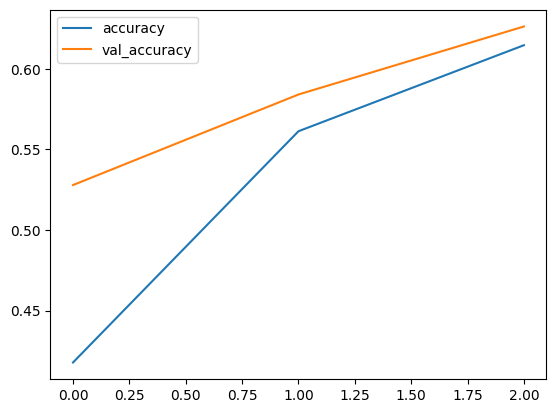

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

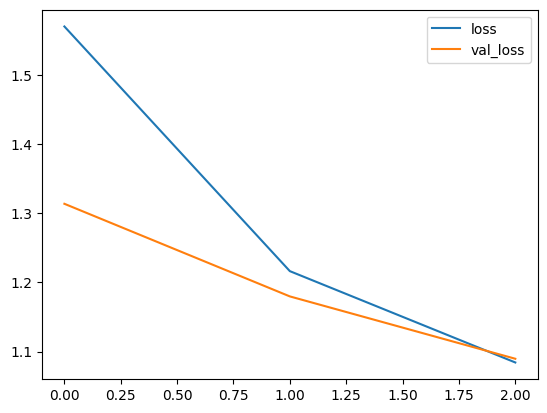

In [ ]:
metrics[['loss','val_loss']].plot()

5. Training the model to get more than 80% accuracy

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[686   3 129  24  32   7  17  17  58  27]
 [ 90 565  28  24   8  11  24  15  54 181]
 [ 45   0 514  72 126  99  89  33  12  10]
 [ 16   2  97 474  68 195  93  45   7   3]
 [ 23   1 119  75 539  43  98  88  11   3]
 [ 14   0  88 182  52 571  26  56   7   4]
 [  9   1  47  72  39  31 784  10   5   2]
 [ 18   0  37  35  68 100  11 721   2   8]
 [125  20  32  28   6  10  11   6 729  33]
 [ 87  43  16  27  13  23  27  45  39 680]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1000
           1       0.89      0.56      0.69      1000
           2       0.46      0.51      0.49      1000
           3       0.47      0.47      0.47      1000
           4       0.57      0.54      0.55      1000
           5       0.52      0.57      0.55      1000
           6       0.66      0.78      0.72      1000
           7       0.70      0.72      0.71      1000
           8       0.79      0.73      0.76      1000
           9       0.72      0.68      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

